In [30]:
import tensorflow as tf
import numpy as np

print([[1,2],[2,3],[3,4]])
print(np.array([[1,2],[2,3],[3,4]]))

layers = []
layers.append([1,2])
layers.append([2,3])
layers.append([3,4])

grads = []
for g in layers:
    print("g:",g)
    expanded_g = tf.expand_dims(g, 0)
    grads.append(expanded_g)
    
print("grads:",grads)
y = tf.concat(grads, axis=0)
grad = tf.reduce_mean(y, 0)

with tf.Session() as sess:
    print("axis=0")
    print(sess.run(y))
    print("grad:",sess.run(grad))

[[1, 2], [2, 3], [3, 4]]
[[1 2]
 [2 3]
 [3 4]]
g: [1, 2]
g: [2, 3]
g: [3, 4]
grads: [<tf.Tensor 'ExpandDims_18:0' shape=(1, 2) dtype=int32>, <tf.Tensor 'ExpandDims_19:0' shape=(1, 2) dtype=int32>, <tf.Tensor 'ExpandDims_20:0' shape=(1, 2) dtype=int32>]
axis=0
[[1 2]
 [2 3]
 [3 4]]
grad: [2 3]


In [14]:
import tensorflow as tf
import numpy as np

logits = [[1,1],[1,1]]
labels = [[1,1],[1,1]]
logits = tf.cast(logits,tf.float32)
labels = tf.cast(labels,tf.float32)
loss = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels,name='cross-entropy')
mean = tf.reduce_mean(loss)
with tf.Session() as sess:
    print("loss:",sess.run([loss,mean]))

loss: [array([1.3862944, 1.3862944], dtype=float32), 1.3862944]


# 测试滑动平均值
我的想法是，黄色线是偶数为1，奇数为0，模拟数据在0-1之间震荡；
蓝色是滑动平均模型的结果，可见滑动平均值最后稳定在0.5附近；

17
[0.0, 0.0]


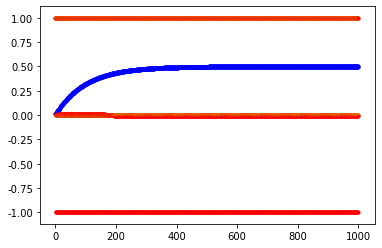

In [149]:
import tensorflow as tf
import sys
import matplotlib.pyplot as plt

v1   = tf.Variable(tf.constant(0, dtype=tf.float32), dtype=tf.float32)
v2   = tf.Variable(tf.constant(0, dtype=tf.float32), dtype=tf.float32)
step = tf.Variable(tf.constant(0, dtype=tf.float32), trainable=False)
ema  = tf.train.ExponentialMovingAverage(0.99, 1000)#step)
maintain_averages_op = ema.apply([v1,v2]) 

#在创建ExponentialMovingAverage对象时，需指定衰减率（decay），用于控制模型的更新速度。
#影子变量的初始值与训练变量的初始值相同。当运行变量更新时，每个影子变量都会更新为：
#shadow_variable = decay * shadow_variable + (1 - decay) * variable
#shadow_variable = decay * shadow_variable + (1 - decay) * variable
#decay= min（decay，（1+steps）/（10+steps））

print(str(sys._getframe().f_lineno))
with tf.Session() as sess:
    # 初始化
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    print(sess.run([v1, ema.average(v1)]))
    # 更新变量v1的取值
    for i in range(1000):
        if i % 2 == 0 :
            sess.run(tf.assign(v1, 1))
            sess.run(tf.assign(v2, 1))
            sess.run(maintain_averages_op)
            rv1, rshadow = sess.run([v1, ema.average(v1)])
            rv2, r2shadow = sess.run([v2, ema.average(v2)])
            plt.scatter(i, rv1,    color='y',s=10)
            plt.scatter(i, rshadow, color='b',s=10)
            plt.scatter(i, rv2,    color='r',s=10)
            plt.scatter(i, r2shadow, color='r',s=10)
        else:
            sess.run(tf.assign(v1, 0))
            sess.run(tf.assign(v2, -1))
            sess.run(maintain_averages_op)
            rv1, rshadow = sess.run([v1, ema.average(v1)])
            rv2, r2shadow = sess.run([v2, ema.average(v2)])
            plt.scatter(i, rv1,    color='y',s=10)
            plt.scatter(i, rshadow, color='b',s=10)
            plt.scatter(i, rv2,    color='r',s=10)
            plt.scatter(i, r2shadow, color='r',s=10)
    plt.show()


# 测试collection

In [106]:
import tensorflow as tf
import sys

tf.reset_default_graph()

w1 = tf.get_variable('w1', shape=[4], dtype=tf.float32, initializer=tf.truncated_normal_initializer(stddev=0.1))

w2 = tf.get_variable('w2', shape=[4], dtype=tf.float32, initializer=tf.constant_initializer(0.1))
#w2 = tf.get_variable('w2', shape=[3], dtype=tf.float32, initializer=tf.constant_initializer(0.1))
#ValueError: Dimension 0 in both shapes must be equal, but are 4 and 3. Shapes are [4] and [3].
#错误在tf.add_n,需要Dimension一致
tf.add_to_collection('w', w1)
tf.add_to_collection('w', w2)
get_w = tf.get_collection('w')
add_w = tf.add_n(get_w)
init_op = tf.global_variables_initializer()

with tf.Session() as sess:
    print(str(sys._getframe().f_lineno))
    sess.run(init_op)
    print(sess.run(w1))
    print(sess.run(w2))
    print(sess.run(get_w))
    print(sess.run(add_w))

19
[-0.01890133 -0.01999565  0.05544787 -0.12423271]
[0.1 0.1 0.1]
[array([-0.01890133, -0.01999565,  0.05544787, -0.12423271], dtype=float32), array([0.1, 0.1, 0.1], dtype=float32)]


In [11]:
import tensorflow as tf
input1 = tf.constant(3.0)
input2 = tf.constant(2.0)
input3 = tf.constant(5.0)
intermed = tf.add(input2, input3)
print(input1, input2,input3)
mul = tf.multiply(input1, intermed)

with tf.Session() as sess:
    r1,r2  = sess.run([mul, intermed])
    result = sess.run([mul, intermed])
    print("result",r1,r2,result)

Tensor("Const_27:0", shape=(), dtype=float32) Tensor("Const_28:0", shape=(), dtype=float32) Tensor("Const_29:0", shape=(), dtype=float32)
result 21.0 7.0 [21.0, 7.0]


### 最近在用到数据筛选，观看代码中有tf.where()的用法，不是很常用，也不是很好理解。在这里记录一下    
```   
1 tf.where(
2     condition,
3     x=None,
4     y=None,
5     name=None
6 )
Return the elements, either from x or y, depending on the condition.
```    
理解：where嘛，就是要根据条件找到你要的东西。

condition：条件，是一个boolean

x：数据

y：同x维度的数据。

返回，返回符合条件的数据。当条件为真，取x对应的数据；当条件为假，取y对应的数据

In [25]:
import tensorflow as tf
import numpy as np
  
#  def test_where():
# 定义一个tensor，表示condition，内部数据随机产生
condition = tf.convert_to_tensor(np.random.random(6), dtype=tf.float32)

# 定义两个tensor，表示原数据
a = tf.ones(shape=[6, 4], name='a')

b = tf.zeros(shape=[6, 4], name='b')

# 选择大于0.5的数值的坐标，并根据condition信息在a和b中选取数据
result = tf.where(condition > 0.5, a, b)

with tf.Session() as sess:
    c,r = sess.run([condition, result])
    print("condition:\n", c)
    print("r:\n",r)

condition:
 [0.71669614 0.48491716 0.96523666 0.45080948 0.975743   0.5014916 ]
r:
 [[1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]


shape: (1280, 2) (1280, 1)


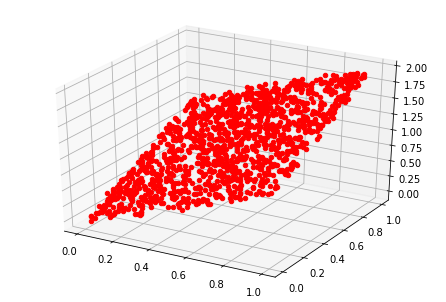

After 0 training step(s), w1 is:  [[-0.81031823]
 [ 1.4855988 ]]
[[-0.81031823]
 [ 1.4855988 ]]
After 1000 training step(s), w1 is:  [[0.01124834]
 [2.1361232 ]]
[[0.01124834]
 [2.1361232 ]]
After 2000 training step(s), w1 is:  [[0.45352313]
 [2.164159  ]]
[[0.45352313]
 [2.164159  ]]
After 3000 training step(s), w1 is:  [[0.7091617]
 [1.8454337]]
[[0.7091617]
 [1.8454337]]
After 4000 training step(s), w1 is:  [[0.9147089]
 [1.308058 ]]
[[0.9147089]
 [1.308058 ]]
Final w1 is: 
 [[1.0261873]
 [1.0455048]]


In [44]:
import tensorflow as tf
from numpy.random import RandomState
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax = Axes3D(fig)

#1.定义神经网络的相关参数和变量。
batch_size = 8
x = tf.placeholder(tf.float32, shape=(None, 2), name="x-input")
y_ = tf.placeholder(tf.float32, shape=(None, 1), name='y-input')

w1= tf.Variable(tf.random_normal([2, 1], stddev=1, seed=1))
y = tf.matmul(x, w1)

#2.设置自定义的损失函数。
# 定义损失函数使得预测少了的损失大，于是模型应该偏向多的方向预测。
loss_less = 10
loss_more = 1
loss = tf.reduce_sum(tf.where(tf.greater(y, y_), (y - y_) * loss_more, (y_ - y) * loss_less))
train_step = tf.train.AdamOptimizer(0.001).minimize(loss)

#3.生成模拟数据集。
rdm = RandomState(1)
X = rdm.rand(1280,2)
Y = [[x1+x2+(rdm.rand()/10.0-0.05)] for (x1, x2) in X]
print("shape:",X.shape,np.array(Y).shape)

for i in range(len(X)):
    ax.scatter(X[i][0], 
               X[i][1],
               Y[i],
            color='red')         
plt.show()
#4. 训练模型。

with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    STEPS = 5000
    for i in range(STEPS):
        start = (i*batch_size) % 128
        end = (i*batch_size) % 128 + batch_size
        sess.run(train_step, feed_dict={x: X[start:end], y_: Y[start:end]})
        if i % 1000 == 0:
            print("After %d training step(s), w1 is: " % (i),sess.run(w1))
            print(sess.run(w1))
    print("Final w1 is: \n", sess.run(w1))

# 学习率的设置    
## 假设我们要最小化函数 $y=x^2$, 选择初始点 $x_0=5$
```
tf.train.exponential_decay(
    learning_rate,     # 初始学习率
    global_step,       # 当前训练轮次
    decay_steps,       # 衰减周期
    decay_rate,        # 衰减率系数
    staircase=False,   # 定义是否是阶梯型衰减，还是连续衰减，默认是 False
    name=None
)
```

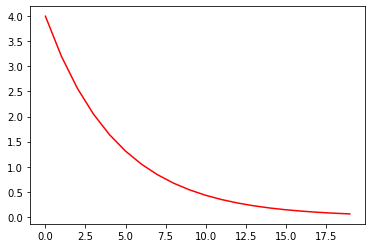

In [90]:
#1. 学习率为1的时候，x在5和-5之间震荡。
#2. 学习率为0.001的时候，下降速度过慢，在901轮时才收敛到0.823355。
#3. 使用指数衰减的学习率，在迭代初期得到较高的下降速度，可以在较小的训练轮数下取得不错的收敛程度。
import tensorflow as tf
import matplotlib.pyplot as plt

TRAINING_STEPS = 20
# LEARNING_RATE = 1
# LEARNING_RATE = 0.001

global_step = tf.Variable(0)
#LEARNING_RATE = tf.train.exponential_decay(0.1, global_step, 1, 0.5, staircase=True)
LEARNING_RATE = tf.train.natural_exp_decay(0.1, global_step, 1, 0.5, staircase=True)
x = tf.Variable(tf.constant(5, dtype=tf.float32), name="x")
y = tf.square(x)
# learning reate 设置的地方
train_op = tf.train.GradientDescentOptimizer(LEARNING_RATE).minimize(y)

plt.figure(1)
x_c = []
i_c = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(TRAINING_STEPS):
        sess.run(train_op)
        lr = sess.run(LEARNING_RATE,feed_dict={global_step:i})
        x_value = sess.run(x,feed_dict={global_step:i})
        #print("After %s iteration(s): x%s is %f."% (i+1, i+1, x_value),lr)
        x_c.append(x_value)
        i_c.append(i)
        
plt.plot(i_c, x_c,'r-')
plt.show()    


# tensorflow中常用学习率更新策略

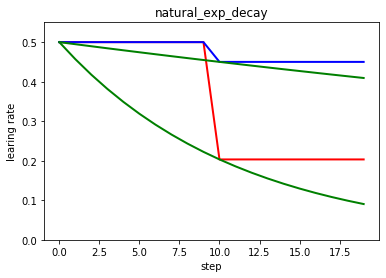

In [100]:
import matplotlib.pyplot as plt
import tensorflow as tf

num_epoch = tf.Variable(0, name='global_step', trainable=False)

y = []
z = []
w = []
m = []
N = 20

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for num_epoch in range(N):
        # 阶梯型衰减
        learing_rate1 = tf.train.natural_exp_decay(
            learning_rate=0.5, global_step=num_epoch, decay_steps=10, decay_rate=0.9, staircase=True)

        # 标准指数型衰减
        learing_rate2 = tf.train.natural_exp_decay(
            learning_rate=0.5, global_step=num_epoch, decay_steps=10, decay_rate=0.9, staircase=False)

        # 阶梯型指数衰减
        learing_rate3 = tf.train.exponential_decay(
            learning_rate=0.5, global_step=num_epoch, decay_steps=10, decay_rate=0.9, staircase=True)

        # 标准指数衰减
        learing_rate4 = tf.train.exponential_decay(
            learning_rate=0.5, global_step=num_epoch, decay_steps=10, decay_rate=0.9, staircase=False)

        lr1 = sess.run([learing_rate1])
        lr2 = sess.run([learing_rate2])
        lr3 = sess.run([learing_rate3])
        lr4 = sess.run([learing_rate4])

        y.append(lr1)
        z.append(lr2)
        w.append(lr3)
        m.append(lr4)

x = range(N)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_ylim([0, 0.55])

plt.plot(x, y, 'r-', linewidth=2)
plt.plot(x, z, 'g-', linewidth=2)
plt.plot(x, w, 'b-', linewidth=2)
plt.plot(x, m, 'g-', linewidth=2)

plt.title('natural_exp_decay')
ax.set_xlabel('step')
ax.set_ylabel('learing rate')
plt.show()

初始的学习速率是0.1，总的迭代次数是1000次，如果staircase=True，那就表明每decay_steps次计算学习速率变化，更新原始学习速率，
如果是False，那就是每一步都更新学习速率。红色表示False，绿色表示True。

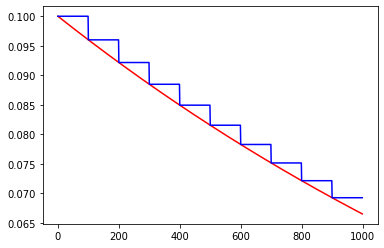

In [53]:
import tensorflow as tf;  
import numpy as np;  
import matplotlib.pyplot as plt;  
  
learning_rate = 0.1  
decay_rate = 0.96  
global_steps = 1000  
decay_steps = 100  
  
global_ = tf.Variable(tf.constant(0))  
c = tf.train.exponential_decay(learning_rate, global_, decay_steps, decay_rate, staircase=True)  
d = tf.train.exponential_decay(learning_rate, global_, decay_steps, decay_rate, staircase=False)  
  
T_C = []  
F_D = []  
  
with tf.Session() as sess:  
    for i in range(global_steps):  
        T_c = sess.run(c,feed_dict={global_: i})  
        T_C.append(T_c)  
        F_d = sess.run(d,feed_dict={global_: i})  
        F_D.append(F_d)  
  
  
plt.figure(1)  
plt.plot(range(global_steps), F_D, 'r-')  
plt.plot(range(global_steps), T_C, 'b-')  
      
plt.show()  

(10,)
Step 0, w: 1.8913, b: -7.9954, Loss: 386647.6880
Step 100000, w: 2.2770, b: -51.8797, Loss: 15390.1345
Step 200000, w: 2.3725, b: -85.0914, Loss: 13169.8196
Step 300000, w: 2.4447, b: -110.2255, Loss: 11898.1884
Step 400000, w: 2.4994, b: -129.2467, Loss: 11169.8926
Step 500000, w: 2.5407, b: -143.6417, Loss: 10752.7790
Step 600000, w: 2.5720, b: -154.5356, Loss: 10513.8873
Step 700000, w: 2.5957, b: -162.7799, Loss: 10377.0679
Step 800000, w: 2.6137, b: -169.0192, Loss: 10298.7080
Step 900000, w: 2.6272, b: -173.7409, Loss: 10253.8292
Step 1000000, w: 2.6375, b: -177.3143, Loss: 10228.1260
Step 1100000, w: 2.6453, b: -180.0186, Loss: 10213.4051
Step 1200000, w: 2.6512, b: -182.0651, Loss: 10204.9741
Step 1300000, w: 2.6556, b: -183.6139, Loss: 10200.1454


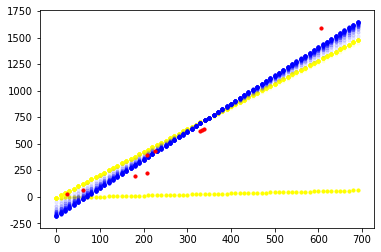

大约需要时间： 24.724786520004272


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 22238 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 24402 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 32447 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 24615 missing from current font.
  font.set_te

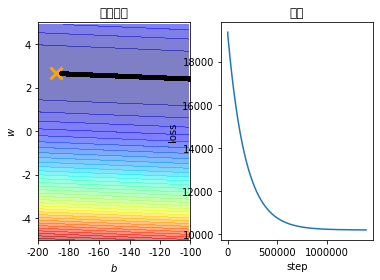

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl

# matplotlib没有中文字体，动态解决
#plt.rcParams['font.sans-serif'] = ['Simhei']  # 显示中文
mpl.rcParams['axes.unicode_minus'] = False  # 解决保存图像是负号'-'显示为方块的问题

#x_data is a list
#x_d is a array
x_data = [338., 333., 328., 207., 226., 25., 179., 60., 208., 606.]
y_data = [640., 633., 619., 393., 428., 27., 193., 66., 226., 1591.]
x_d = np.asarray(x_data)
y_d = np.asarray(y_data)


x = np.arange(-200, -100, 1)
y = np.arange(-5, 5, 0.1)
Z = np.zeros((len(x), len(y)))
X, Y = np.meshgrid(x, y)

# loss
for i in range(len(x)):
    for j in range(len(y)):
        b = x[i]
        w = y[j]
        Z[j][i] = 0  # meshgrid吐出结果：y为行，x为列
        for n in range(len(x_data)):
            Z[j][i] += (y_data[n] - b - w * x_data[n]) ** 2
        Z[j][i] /= len(x_data)
        

# linear regression
#b = -120
#w = -4
b=-8
w=0.1
lr = 0.000005
iteration = 1400000

b_history = [b]
w_history = [w]
loss_history = []
import time
start = time.time()

rx = np.arange(0, 700, 10)
ry = w * rx  +b
plt.scatter(rx, 
            ry,
            color = 'yellow',
            alpha = 1,
            s=10)
    
for i in range(iteration):
    m = float(len(x_d))
    y_hat = w * x_d  +b
    loss = np.dot(y_d - y_hat, y_d - y_hat) / m
    grad_b = -2.0 * np.sum(y_d - y_hat) / m
    grad_w = -2.0 * np.dot(y_d - y_hat, x_d) / m
    # update param
    b -= lr * grad_b
    w -= lr * grad_w

    b_history.append(b)
    w_history.append(w)
    loss_history.append(loss)
    
    if i <10 :
        ry = w * rx  +b
        plt.scatter(rx, 
                    ry,
                    color = 'yellow',
                    alpha = i/10,
                    s=10)
            
    if i % 100000 == 0:
        print("Step %i, w: %0.4f, b: %.4f, Loss: %.4f" % (i, w, b, loss))
        ry = w * rx  +b
        plt.scatter(rx, 
                    ry,
                    color = 'blue',
                    alpha = i/1400000,
                    s=10)
        
plt.scatter(x_d, 
            y_d,
            color='red',
            s=10)         
plt.show()

end = time.time()
print("大约需要时间：",end-start)


# plot the figure
plt.subplot(1, 2, 1)
C = plt.contourf(x, y, Z, 50, alpha=0.5, cmap=plt.get_cmap('jet'))  # 填充等高线
# plt.clabel(C, inline=True, fontsize=5)
plt.plot([-188.4], [2.67], 'x', ms=12, mew=3, color="orange")
plt.plot(b_history, w_history, 'o-', ms=3, lw=1.5, color='black')
plt.xlim(-200, -100)
plt.ylim(-5, 5)
plt.xlabel(r'$b$')
plt.ylabel(r'$w$')
plt.title("线性回归")

plt.subplot(1, 2, 2)
loss = np.asarray(loss_history[2:iteration])
plt.plot(np.arange(2, iteration), loss)
plt.title("损失")
plt.xlabel('step')
plt.ylabel('loss')
plt.show()

plt.show()
# 李宏毅老师课堂中的Demo要140万次才能收敛到最优，结果如下

# tf.reduce_mean    
tf.reduce_mean 函数用于计算张量tensor沿着指定的数轴（tensor的某一维度）上的的平均值，主要用作降维或者计算tensor（图像）的平均值。  
```
reduce_mean(input_tensor,
                axis=None,
                keep_dims=False,
                name=None,
                reduction_indices=None)
```
1. 第一个参数input_tensor： 输入的待降维的tensor;
1. 第二个参数axis： 指定的轴，如果不指定，则计算所有元素的均值;
1. 第三个参数keep_dims：是否降维度，设置为True，输出的结果保持输入tensor的形状，设置为False，输出结果会降低维度;
1. 第四个参数name： 操作的名称;
1. 第五个参数 reduction_indices：在以前版本中用来指定轴，已弃用;

## 似函数还有:

1. tf.reduce_sum ：计算tensor指定轴方向上的所有元素的累加和;
1. tf.reduce_max  :  计算tensor指定轴方向上的各个元素的最大值;
1. tf.reduce_all :  计算tensor指定轴方向上的各个元素的逻辑和（and运算）;
1. tf.reduce_any:  计算tensor指定轴方向上的各个元素的逻辑或（or运算）;


In [111]:
import tensorflow as tf
 
x = [[1,2,3],
     [4,5,6]]
 
xx = tf.cast(x,tf.float32)
print(xx)

mean_all = tf.reduce_mean(xx, keep_dims=False)
mean_0 = tf.reduce_mean(xx, axis=0, keep_dims=False)
mean_1 = tf.reduce_mean(xx, axis=1, keep_dims=False)
mean_2 = tf.reduce_mean(xx, axis=0, keep_dims=True)
mean_3 = tf.reduce_mean(xx, axis=1, keep_dims=True)
mean_4 = tf.reduce_mean(xx)
 
sum_all = tf.reduce_sum(xx, keep_dims=False)
sum_0   = tf.reduce_sum(xx, axis=0, keep_dims=False)
sum_1   = tf.reduce_sum(xx, axis=1, keep_dims=False)
sum_2   = tf.reduce_sum(xx, axis=0, keep_dims=True)
sum_3   = tf.reduce_sum(xx, axis=1, keep_dims=True)
sum_4   = tf.reduce_sum(xx)    
    
with tf.Session() as sess:
    m_a,m_0,m_1,m_2,m_3,m_4 = sess.run([mean_all, mean_0, mean_1, mean_2, mean_3, mean_4])
    s_a,s_0,s_1,s_2,s_3,s_4 = sess.run([sum_all, sum_0, sum_1, sum_2, sum_3, sum_4])
print("mean_all")
print(m_a)
print("mean_0")
print(m_0)
print("mean_1")
print(m_1)
print("flow outputs of keep_dims is True mean_2,mean_3")
print(m_2)
print(m_3)
print("flow outpust of default parameters,mean_4")
print(m_4)

print("reduce_sum:")
print(s_a)
print(s_0)
print(s_1)
print("flow outputs of keep_dims is True")
print(s_2)
print(s_3)
print("flow outpust of default parameters")
print(s_4)

Tensor("Cast:0", shape=(2, 3), dtype=float32)
Instructions for updating:
keep_dims is deprecated, use keepdims instead
mean_all
3.5
mean_0
[2.5 3.5 4.5]
mean_1
[2. 5.]
flow outputs of keep_dims is True mean_2,mean_3
[[2.5 3.5 4.5]]
[[2.]
 [5.]]
flow outpust of default parameters,mean_4
3.5
reduce_sum:
21.0
[5. 7. 9.]
[ 6. 15.]
flow outputs of keep_dims is True
[[5. 7. 9.]]
[[ 6.]
 [15.]]
flow outpust of default parameters
21.0


In [ ]:
# 综合小栗子
## 

total_cross_entropy: 4.798863
total_cross_entropy: 0.09629472
total_cross_entropy: 0.08692155
total_cross_entropy: 0.07987224
total_cross_entropy: 0.074137546
total_cross_entropy: 0.06932657
total_cross_entropy: 0.065255776
total_cross_entropy: 0.0617726
total_cross_entropy: 0.058713596
total_cross_entropy: 0.056039296
>>total_cross_entropy: 0.053687546


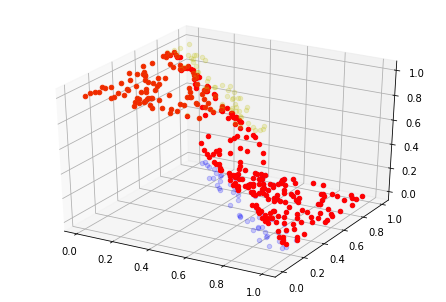

In [130]:
import tensorflow as tf
from numpy.random import RandomState
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

def sigmoid(x):
    s = 1 / (1 + np.exp(-x))
    return s


batch_size = 8
fig = plt.figure()
ax = Axes3D(fig)

w1 = tf.Variable(tf.random_normal([3, 3],  stddev=1, seed=1), name='w1') 
w2 = tf.Variable(tf.random_normal([3, 3],  stddev=1, seed=1), name='w2')
w3 = tf.Variable(tf.random_normal([3, 3],  stddev=1, seed=1), name='w3')
w4 = tf.Variable(tf.random_normal([3, 1],  stddev=1, seed=1), name='w4')

x  = tf.placeholder(tf.float32, shape=(None, 3),  name='x-input')
y_ = tf.placeholder(tf.float32 , shape=(None, 1), name='y-input')

#待估模型；2层hidden
a   = tf.matmul(x,   w1, name='xw1')
yh  = tf.matmul(a,   w2, name='hiden1')
yh2 = tf.matmul(yh,  w3, name='hiden2')
y   = tf.matmul(yh2, w4, name='output')
#结果做sigmod
y=tf.sigmoid(y,name="sigmoid")
## L2 regularizer 还没试过
##loss= tf.reduce mean(tf.square(y - y)) + tf .contrib . layers .12 regularizer (lambda) (w)
#cross_entropy= -tf.reduce_mean( y_ * tf.log(tf.clip_by_value(y, 1e-10, 1.0)) + (1-y_)*tf.log(tf.clip_by_value(1-y, 1e-10, 1.0)),name='reduce_mean')
lambda1 = 0.001
L2w1 = tf.contrib.layers.l2_regularizer(lambda1)(w1)
L2w2 = tf.contrib.layers.l2_regularizer(lambda1)(w2)
L2w3 = tf.contrib.layers.l2_regularizer(lambda1)(w3)
L2w4 = tf.contrib.layers.l2_regularizer(lambda1)(w4)
cross_entropy = -tf.reduce_mean(y_ * tf.log(tf.clip_by_value(y, 1e-10, 1.0)) + (1-y_)*tf.log(tf.clip_by_value(1-y, 1e-10, 1.0)),name='reduce_mean')## + tf.contrib.layers.12regularizer(0.3)(w)
loss = cross_entropy + L2w1 + L2w2 + L2w3 + L2w4

#learning rate=tf.train.exponential_decay(0.1, global_step, 100, 0.96, staircase=True)
# got 0.073
#train_step = tf.train.AdamOptimizer(0.00001).minimize(cross_entropy)
# got 0.074 
#train_step = tf.train.GradientDescentOptimizer(0.0001).minimize(cross_entropy)
# got 0.016
train_step = tf.train.MomentumOptimizer(0.0001,0.9).minimize(loss)#cross_entropy) 

#开始造数据
rdm = RandomState(1)
dataset_size = 300
X = rdm.rand(dataset_size, 3)
#xi[2] == 1
#(x1, x2, 1)[[w11, w12, w13],[w21, w22, w23],
for xi in X:
    xi[2] = 1.0
    
Y = [[int(xl+x2 < 1)] for (xl, x2, xb) in X]


with tf.Session() as sess:
    init_op = tf.global_variables_initializer()
    sess.run(init_op)
    #before Trainning
    STEPS = 10000
    for i in range (STEPS):
        start = (i * batch_size) % dataset_size
        end   =  min (start+batch_size , dataset_size )
        sess.run(train_step, feed_dict={x:X[start:end],  y_:Y[start:end]})
        
        if i% 1000 == 0:
            total_cross_entropy = sess.run( cross_entropy, feed_dict={x: X, y_ : Y})
            print("total_cross_entropy:",total_cross_entropy)

    total_cross_entropy = sess.run( cross_entropy, feed_dict={x: X, y_ : Y})
    print(">>total_cross_entropy:",total_cross_entropy)
    rw1 = sess.run(w1)
    rw2 = sess.run(w2)
    rw3 = sess.run(w3)
    rw4 = sess.run(w4)
    
    for ii in range(0, dataset_size):
        if Y[ii][0] > 0 :
            ax.scatter(X[ii][0], X[ii][1], Y[ii], alpha=0.2, color='y')
        else:
            ax.scatter(X[ii][0], X[ii][1], Y[ii], alpha=0.2, color='b')

    
    ra = np.matmul(X, rw1)
    ryh = np.matmul(ra, rw2) 
    ryh2 = np.matmul(ryh, rw3)
    ry = np.matmul(ryh2, rw4)
    
    for ii in range(0, dataset_size):
        #print("sigmoid(ry[i])",Y[i],sigmoid(ry[i]),X[i][0], X[i][1], ra[i])
        ax.scatter(X[ii][0], X[ii][1], sigmoid(ry[ii]), alpha=1, color='r')

    plt.show()
    #tensorboard --logdir="my_graph"
    writer = tf.summary.FileWriter('./my_graph', sess.graph)#创建并启动summary.FileWriter对象，接收两个参数，一是数据流图磁盘存放路径；二是Session对象graph属性。
    writer.close()

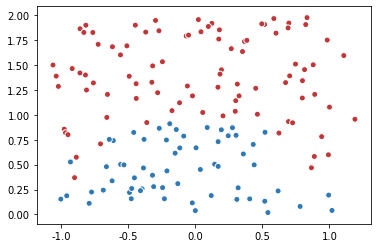

i 0
i 2000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: UserWarning: No contour levels were found within the data range.


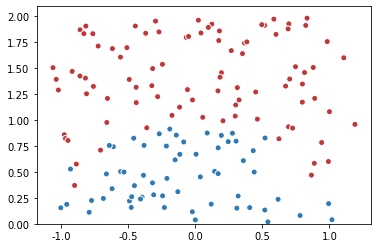

In [128]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

def get_weight(shape, lambda1):
    var = tf.Variable(tf.random_normal(shape,0.01), dtype=tf.float32)
    '''
    tf.contrib.layers.l1_regularizer(scale, scope=None)
    返回一个用来执行L1正则化的函数,函数的签名是func(weights).
    参数:
    scale: 正则项的系数.
    scope: 可选的scope name
    tf.contrib.layers.l2_regularizer(scale, scope=None)
    返回一个执行L2正则化的函数.

    tf.contrib.layers.sum_regularizer(regularizer_list, scope=None)
    返回一个可以执行多种(个)正则化的函数.意思是,创建一个正则化方法,这个方法是多个正则化方法的混合体.
    参数:
    regularizer_list: regulizer的列表
    '''
    tf.add_to_collection('losses', tf.contrib.layers.l2_regularizer(lambda1)(var))
    return var

data = []
label = []
np.random.seed(0)

# 以原点为圆心，半径为1的圆把散点划分成红蓝两部分，并加入随机噪音。
for i in range(150):
    x1 = np.random.uniform(-1,1)
    x2 = np.random.uniform(0,2)
    if x1**2 + x2**2 <= 1:
        data.append([np.random.normal(x1, 0.1),np.random.normal(x2,0.01)])
        label.append(1)
    else:
        data.append([np.random.normal(x1, 0.1), np.random.normal(x2, 0.01)])
        label.append(0)
        
data = np.hstack(data).reshape(-1,2).astype(np.float32)
label = np.hstack(label).reshape(-1).astype(np.float32)

plt.scatter(data[:,0], data[:,1], c=label,
           cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
plt.show()

x  = tf.placeholder(tf.float32, shape=(None, 2))
y_ = tf.placeholder(tf.float32, shape=(None,))

sample_size = len(data)


# 每层节点的个数
# x=[none,2] 一个数据有两个feature
# w1=2x10 w2=10x5 w3=5x3 w4=3x1
layer_dimension = [2,10,5,3,1]
n_layers = len(layer_dimension)
cur_layer = x
in_dimension = layer_dimension[0]

# 循环生成网络结构
for i in range(1, n_layers):
    out_dimension = layer_dimension[i]
    weight = get_weight([in_dimension, out_dimension], 0.003)
    bias = tf.Variable(tf.constant(0.1, shape=[out_dimension]))
    cur_layer = tf.nn.relu(tf.matmul(cur_layer, weight) + bias)
    in_dimension = layer_dimension[i]

y = cur_layer

# 损失函数的定义。
mse_loss = tf.reduce_sum(tf.pow(y_ - y, 2)) / sample_size
tf.add_to_collection('losses', mse_loss)
loss = tf.add_n(tf.get_collection('losses'))

# 定义训练的目标函数loss，训练次数及训练模型
train_op = tf.train.AdamOptimizer(0.01).minimize(mse_loss)#loss)
TRAINING_STEPS = 4000


with tf.Session() as sess:
    tf.global_variables_initializer().run()
    for i in range(TRAINING_STEPS):
        re=sess.run(train_op, feed_dict={x: data, y_: label})
        if i % 2000 == 0:
            print("i",i)
            #print("After %d steps, loss: %f" % (i, sess.run(loss, feed_dict={x: data, y_: label})))

    # 画出训练后的分割曲线       
    xx, yy = np.mgrid[-1:1:.01, 0:2:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    
    probs = sess.run(y, feed_dict={x:grid})
    probs = probs.reshape(xx.shape)

    plt.scatter(data[:,0], data[:,1], c=label,
           cmap="RdBu", vmin=-.2, vmax=1.2, edgecolor="white")
    plt.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.01)
    plt.show()

## 画出卷积层图像

In [ ]:
import sys
import importlib
import matplotlib.pyplot as plt
import numpy as np
#importlib.reload(sys)

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

mnist = input_data.read_data_sets('./leo-mnist', one_hot=True)

# 初始化生成随机的权重(变量)，避免神经元输出恒为0
def weight_variable(shape):
    # 以正态分布生成随机值
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# 初始化生成随机的偏置项(常量)，避免神经元输出恒为0
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# 卷积采用1步长，0边距，保证输入输出大小相同
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# 池化采用2×2模板
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1], padding='SAME')

# 28*28=784
x = tf.placeholder(tf.float32, [None, 784])
# 输出类别共10个：0-9
y_ = tf.placeholder("float", [None,10])

# 第一层卷积权重，视野是5*5，输入通道1个，输出通道32个
W_conv1 = weight_variable([5, 5, 1, 32])
# 第一层卷积偏置项有32个
b_conv1 = bias_variable([32])

# 把x变成4d向量，第二维和第三维是图像尺寸，第四维是颜色通道数1
x_image = tf.reshape(x, [-1,28,28,1])
h_conv2d1 = conv2d(x_image, W_conv1)
h_conv1 = tf.nn.relu(h_conv2d1 + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# 第二层卷积权重，视野是5*5，输入通道32个，输出通道64个
W_conv2 = weight_variable([5, 5, 32, 64])
# 第二层卷积偏置项有64个
b_conv2 = bias_variable([64])
h_conv2d2 = conv2d(h_pool1, W_conv2)
h_conv2 = tf.nn.relu(h_conv2d2 + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# 第二层池化后尺寸编程7*7，第三层是全连接，输入是64个通道，输出是1024个神经元
W_fc1 = weight_variable([7 * 7 * 64, 1024])
# 第三层全连接偏置项有1024个
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# 按float做dropout，以减少过拟合
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 最后的softmax层生成10种分类
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))

# Adam优化器来做梯度最速下降
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(1500):
    batch = mnist.train.next_batch(50)
    if i == 0:
        print("i=",i)
        rhconv2d=sess.run(h_conv2d1,feed_dict={x: [batch[0][0]], y_: [batch[1][0]], keep_prob: 0.5})
        rhconv2d2=sess.run(h_conv2d2,feed_dict={x: [batch[0][0]], y_: [batch[1][0]], keep_prob: 0.5})
        print("rhconv2d",rhconv2d.shape)
        print("rhconv2d2",rhconv2d2.shape)
        #构建一个窗口
        plt.figure(num='rhconv2d')
        #一个filter层导出一副图片
        for lay in range(32):        
            data=[]
            for j in  range(28):
                for i in range(28):
                    #区别一下list和array
                    data.append(rhconv2d[0][j][i][lay])
            #窗口上画4x8个图片中的第lay+1个图片
            plt.subplot(4,8,lay+1)
            plt.imshow(np.asarray(data).reshape(28,28))
        plt.show()
        
        #卷积层2
        plt.figure(num='conv2d2')
        for lay in range(64):
            data=[]
            for j in  range(14):
                for i in range(14):
                    data.append(rhconv2d2[0][j][i][lay])
            plt.subplot(8,8,lay+1)
            plt.imshow(np.asarray(data).reshape(14,14))
        print("len",len(batch),len(batch[0]),len(batch[1]))
        plt.show()
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

In [17]:
import sys
import importlib
importlib.reload(sys)

from tensorflow.examples.tutorials.mnist import input_data
import tensorflow as tf

#flags = tf.app.flags
#FLAGS = flags.FLAGS

#flags.DEFINE_string('data_dir', './', 'Directory for storing data')

mnist = input_data.read_data_sets('./', one_hot=True)

# 初始化生成随机的权重(变量)，避免神经元输出恒为0
def weight_variable(shape):
    # 以正态分布生成随机值
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)

# 初始化生成随机的偏置项(常量)，避免神经元输出恒为0
def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)

# 卷积采用1步长，0边距，保证输入输出大小相同
def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')

# 池化采用2×2模板
def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
        strides=[1, 2, 2, 1], padding='SAME')

# 28*28=784
x = tf.placeholder(tf.float32, [None, 784])
# 输出类别共10个：0-9
y_ = tf.placeholder("float", [None,10])

# 第一层卷积权重，视野是5*5，输入通道1个，输出通道32个
W_conv1 = weight_variable([5, 5, 1, 32])
# 第一层卷积偏置项有32个
b_conv1 = bias_variable([32])

# 把x变成4d向量，第二维和第三维是图像尺寸，第四维是颜色通道数1
x_image = tf.reshape(x, [-1,28,28,1])

h_conv1 = tf.nn.relu(conv2d(x_image, W_conv1) + b_conv1)
h_pool1 = max_pool_2x2(h_conv1)

# 第二层卷积权重，视野是5*5，输入通道32个，输出通道64个
W_conv2 = weight_variable([5, 5, 32, 64])
# 第二层卷积偏置项有64个
b_conv2 = bias_variable([64])

h_conv2 = tf.nn.relu(conv2d(h_pool1, W_conv2) + b_conv2)
h_pool2 = max_pool_2x2(h_conv2)

# 第二层池化后尺寸编程7*7，第三层是全连接，输入是64个通道，输出是1024个神经元
W_fc1 = weight_variable([7 * 7 * 64, 1024])
# 第三层全连接偏置项有1024个
b_fc1 = bias_variable([1024])

h_pool2_flat = tf.reshape(h_pool2, [-1, 7*7*64])
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

# 按float做dropout，以减少过拟合
keep_prob = tf.placeholder("float")
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

# 最后的softmax层生成10种分类
W_fc2 = weight_variable([1024, 10])
b_fc2 = bias_variable([10])

y_conv=tf.nn.softmax(tf.matmul(h_fc1_drop, W_fc2) + b_fc2)

cross_entropy = -tf.reduce_sum(y_*tf.log(y_conv))

# Adam优化器来做梯度最速下降
train_step = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv,1), tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))

sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

for i in range(1500):
    batch = mnist.train.next_batch(50)
    if i%100 == 0:
        train_accuracy = accuracy.eval(feed_dict={
            x:batch[0], y_: batch[1], keep_prob: 1.0})
        print("step %d, training accuracy %g"%(i, train_accuracy))
    train_step.run(feed_dict={x: batch[0], y_: batch[1], keep_prob: 0.5})

print("test accuracy %g"%accuracy.eval(feed_dict={
    x: mnist.test.images, y_: mnist.test.labels, keep_prob: 1.0}))

Extracting ./train-images-idx3-ubyte.gz
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz


/usr/local/lib/python3.6/dist-packages/tensorflow_core/python/client/session.py:1750: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


step 0, training accuracy 0.04
step 100, training accuracy 0.86
step 200, training accuracy 0.92
step 300, training accuracy 0.92
step 400, training accuracy 0.9
step 500, training accuracy 0.94
step 600, training accuracy 0.92
step 700, training accuracy 0.96
step 800, training accuracy 0.98
step 900, training accuracy 0.94
step 1000, training accuracy 0.94
step 1100, training accuracy 1
step 1200, training accuracy 0.98
step 1300, training accuracy 0.94
step 1400, training accuracy 0.96
step 1500, training accuracy 0.98
step 1600, training accuracy 0.94
step 1700, training accuracy 0.98
step 1800, training accuracy 0.98
step 1900, training accuracy 1
step 2000, training accuracy 1
step 2100, training accuracy 0.98
step 2200, training accuracy 1
step 2300, training accuracy 1
step 2400, training accuracy 1
step 2500, training accuracy 0.98
step 2600, training accuracy 0.96
step 2700, training accuracy 1
step 2800, training accuracy 1
step 2900, training accuracy 1
test accuracy 0.9835